In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('health_trends_data.csv')  

# Convert date column to datetime 
df['date'] = pd.to_datetime(df['date'])

# I'm going to try and look at the longevity of trends, seeing if their seasonal, yearly, etc, so I get the monthes, the years, 
# and I also shift the interest score back by 20 days. I chose 20 after arbitrarily after experiencing with a couple other numbers
#interst_score_diff is the difference in interest score between the actual interest score and the interest score from 20 days prior
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['interest_score_shift'] = df['interest_score'].shift(20)  
df['interest_score_diff'] = df['interest_score'].diff()  
# Drop NaN values cause by the shift
df.dropna(inplace=True)  
df


,search_term,date,interest_score,year,month,interest_score_shift,interest_score_diff
20,intermittent fasting,2005-09-01,0,2005,9,0.0,0.0
21,intermittent fasting,2005-10-01,0,2005,10,0.0,0.0
22,intermittent fasting,2005-11-01,0,2005,11,0.0,0.0
23,intermittent fasting,2005-12-01,0,2005,12,0.0,0.0
24,intermittent fasting,2006-01-01,0,2006,1,0.0,0.0
...,...,...,...,...,...,...,...
3007,sleep quality,2024-07-01,71,2024,7,60.0,0.0
3008,sleep quality,2024-08-01,77,2024,8,54.0,6.0
3009,sleep quality,2024-09-01,90,2024,9,68.0,13.0
3010,sleep quality,2024-10-01,94,2024,10,69.0,4.0


In [3]:
# Select features 
features = ['interest_score_shift', 'interest_score_diff', 'month', 'year']

# Since they're are multiple x-values I scale them here
for feature in features:
    mean = df[feature].mean()
    std_dev = df[feature].std()
    df[feature] = (df[feature] - mean) / std_dev

print(df[features].head())


    interest_score_shift  interest_score_diff     month      year
20             -1.404822            -0.004452  0.730974 -1.502934
21             -1.404822            -0.004452  1.021422 -1.502934
22             -1.404822            -0.004452  1.311870 -1.502934
23             -1.404822            -0.004452  1.602318 -1.502934
24             -1.404822            -0.004452 -1.592610 -1.336387


In [4]:
#do the train test split
X = df[features]
y = df['interest_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [7]:
import numpy as np
# Our second type of ML algorithm is a classification example so we convert interest_score to binary for classification
#(e.g., above median is 1)
df['interest_class'] = (df['interest_score'] > df['interest_score'].median()).astype(int)
y_class = df['interest_class']
#redo the training
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.4)

# run linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
#calculate mse
residuals = y_test - y_pred  # Residuals
mse = np.mean(residuals ** 2)
#calculate r^2
r2 = 1 - (mse)/(y_test.var()) 

# Evaluate Linear Regression
print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R^2 Score: {r2}")

Linear Regression Mean Squared Error: 211.2167939805024
Linear Regression R^2 Score: 0.6677423080294896


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

# Model A
modelA = LinearRegression()
modelA.fit(Xtrain.iloc[:, :1], ytrain)  

# Predictions with A
predA = modelA.predict(Xtest.iloc[:, :1])  
resA = ytest - predA 

# MSE and R^2 for A
MSE_A = (resA**2).mean()
r2_A = 1 - (MSE_A / ytest.var())

# Model B
modelB = LinearRegression()
modelB.fit(Xtrain.iloc[:, :4], ytrain)  

# Predictions with B
predB = modelB.predict(Xtest.iloc[:, :4])  
resB = ytest - predB  

# MSE and R^2 for B
MSE_B = (resB**2).mean()
r2_B = 1 - (MSE_B / ytest.var())


print(f"Model A MSE: {MSE_A}")
print(f"Model A R^2: {r2_A}")
print(f"Model B MSE: {MSE_B}")
print(f"Model B R^2: {r2_B}")


Model A MSE: 246.03047231933235
Model A R^2: 0.6129781380225765
Model B MSE: 211.2167939805024
Model B R^2: 0.6677423080294896


We created this machine learning algorithm to try and classify the importance of different variables in our data. If month showed a strong impact in our predictions then we could infer that health trends are influenced by the seasons. For example, weight loss trends might spike in January due to New Year's Resolutions, and home workouts could increase in winter because people are spending more time inside. If year had a strong impact then it could mean that overall interest in health searches are growing/decreasing (if the impact is positive or negative) over the long-term. If the interest_score_shift had a strong impact, it would suggest that trends sustain themselves over long periods of time, and don't change that easily. If interest_score_diff had a strong impact then it could suggest that sudden spikes or dips in an interest heavily influence whether or not that trend gains traction.

Looking at our cross-validated data 

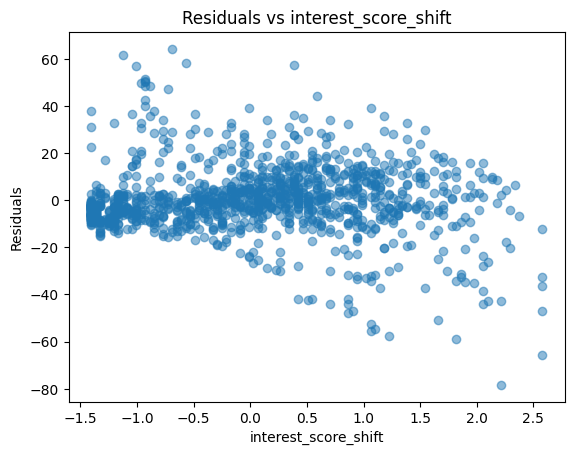

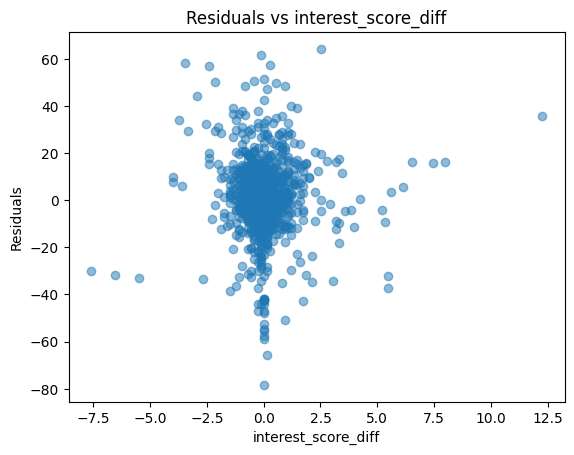

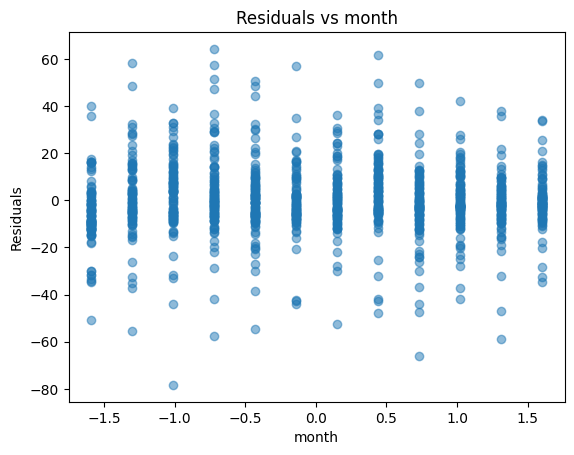

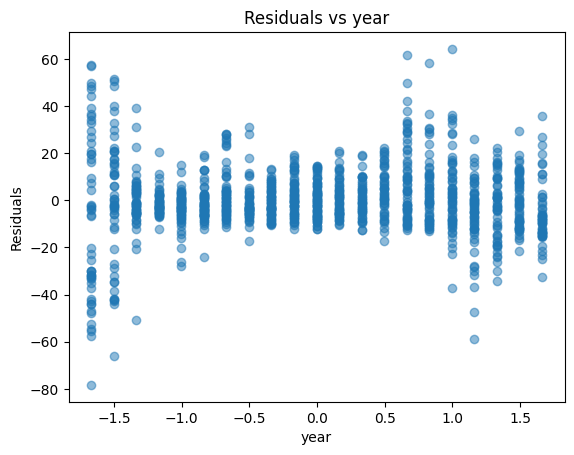

In [11]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
for feature in ['interest_score_shift', 'interest_score_diff', 'month', 'year']:
    plt.scatter(X_test[feature], residuals, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {feature}')
    plt.show()


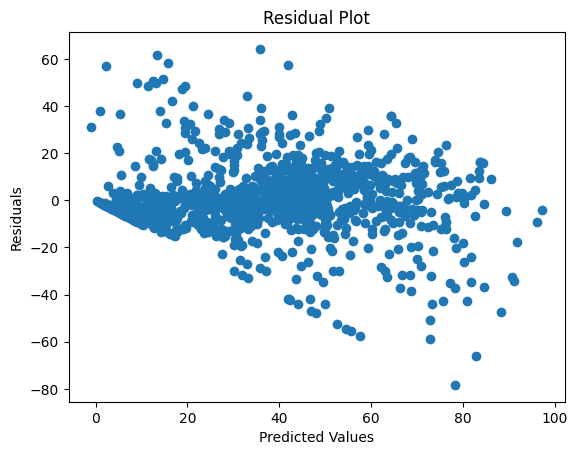

In [12]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
